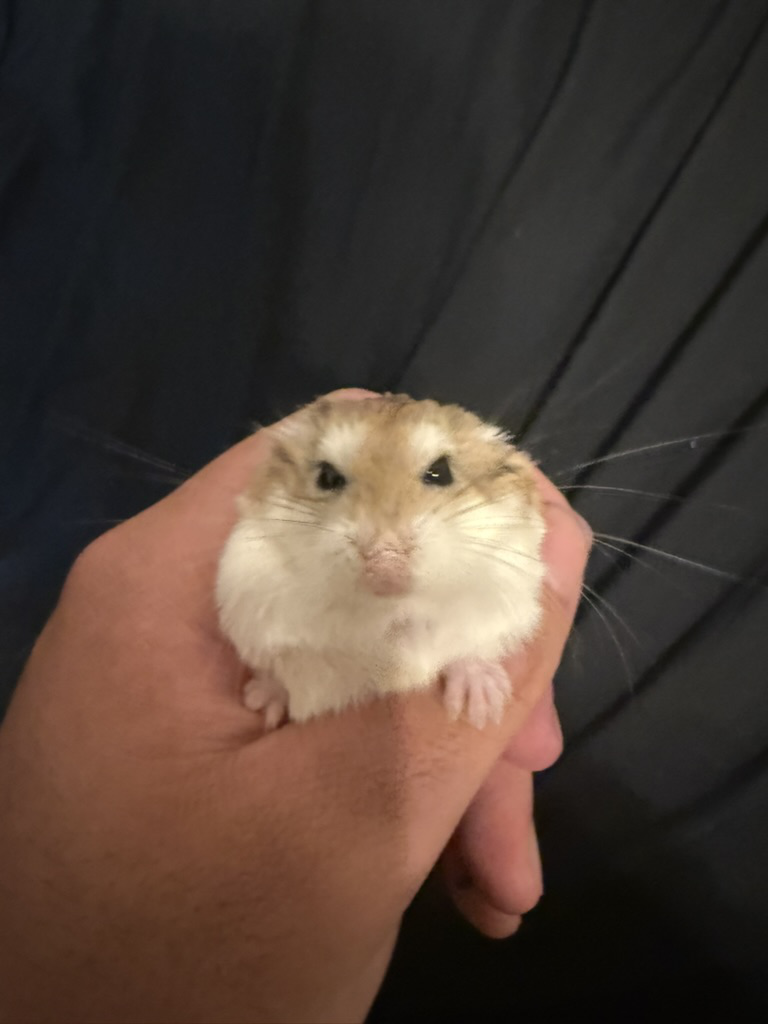

In [30]:
import matplotlib.pyplot as plt  # Importing for visualization
import numpy as np  # Importing NumPy for numerical operations
import pickle
from IPython.display import display
from PIL import Image

img = Image.open("../bread.jpeg")  # Replace with your file path
display(img)

### Problem A

Consider the 2D Ising model in a square lattice $\Lambda$ with $100\times 100$ sites and periodic boundary conditions in the presence of an external magnetic field $B$.
The energy of the system for a given spin configuration $\sigma = \{\sigma_i\}_{i\in \Lambda}$ is
\begin{equation}
  E(\sigma) = -J\sum_{\langle ij\rangle} \sigma_i\sigma_j - B\sum_{i\in \Lambda} \sigma_i,
\end{equation}
where $\langle i j \rangle$ denotes two adjacent sites (with no double counting), $J$ is the spin-spin interaction, and $\sigma_i \in \{ -1, +1\}$ is the spin at site $i$.

The magnetization of the system is
\begin{equation}
  M(\sigma) = \frac{1}{|\Lambda|}\sum_{i\in \Lambda} \sigma_i.
\end{equation}


Problem A: Use Markov chain Monte Carlo and the Metropolis-Hastings algorithm to simulate the 2D Ising model at different temperatures $T$ and magnetic field strengths $B$.
Discuss your strategy for determining the initial configuration, burn-in steps, total number of steps, and thinning (if any).


In [31]:
# Constants and Parameters
N = 100  # Lattice size
J = 1  # Spin interaction strength
KB = 1  # Boltzmann constant (set to 1 for simplicity)
B = 0.1  # Magnetic field strength
steps = 200_000  # Total number of Monte Carlo steps

np.random.seed(420)

# Perform Markov Chain Monte Carlo (MCMC) simulation using the Metropolis-Hastings algorithm
def MCMC(lattice_spins, temp, steps, B):
    m_values = []  # Store magnetization values
    t = 0  # Counter

    while t < steps:
        #Randomly flip
        i, j = np.random.randint(N), np.random.randint(N)
        delta_energy = 0  #Compute energy Change
        for k, l in [(-1, 0), (1, 0), (0, 1), (0, -1)]: #Neighbour
        
        #Boundary condition
            i_neigh = i + k if i + k < N else 0 
            j_neigh = j + l if j + l < N else 0  
        # Effect of external magnetic field
            delta_energy += -J * -2 * lattice_spins[i, j] * lattice_spins[i_neigh, j_neigh]  
            delta_energy += 2 * B * lattice_spins[i, j]

    # Metropolis-Hastings acceptance rule
        if delta_energy <= 0:
            lattice_spins[i, j] *= -1 # Flip if energy decreases
        elif delta_energy > 0:
            prob = np.exp(-delta_energy / (KB * temp)) 
            # Compute acceptance probability
            if np.random.random() < prob:  # Accept the flip
                lattice_spins[i, j] *= -1  # Flip
        m_values.append(np.mean(lattice_spins))  # Store average
        t += 1
    return m_values

In [32]:
#try different value of temperature and magnetic field
temp = 2
B = 0.1

In [33]:
# Initializing with all spin up
lattice_spins = np.ones((N, N))
m_values_up = MCMC(lattice_spins, temp, steps, B)

# Initializing the spin lattice randomly
lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values_rand = MCMC(lattice_spins, temp, steps, B)

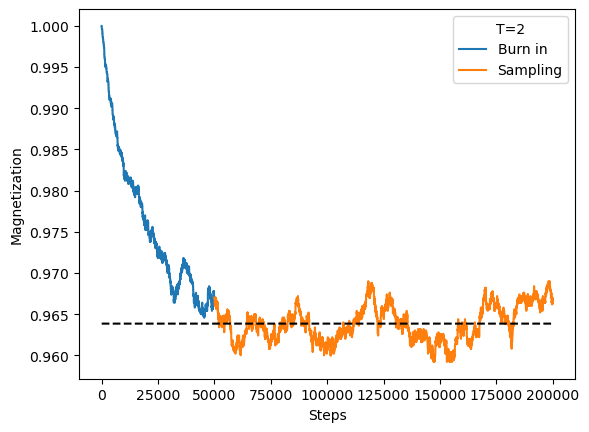

<Figure size 640x480 with 0 Axes>

In [34]:
#Pollting with burnin 50000
burnin_up = 50_000
m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.figure()
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burn in")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"T={temp:.0f}")
plt.show()
plt.savefig("./plots/simple_approach_fixT=2_B=0.1.png")

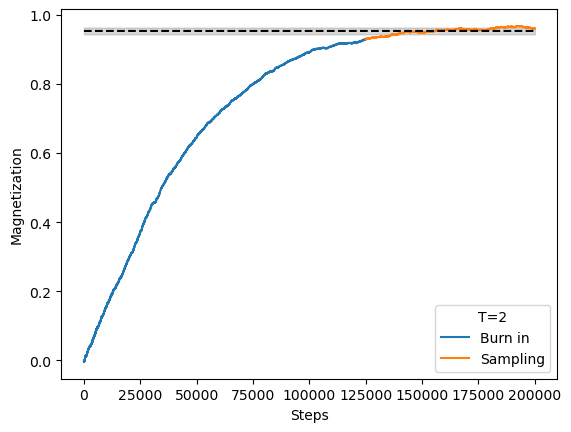

<Figure size 640x480 with 0 Axes>

In [35]:
burnin_rand = 125_000
m_mean_rand = np.mean(m_values_rand[burnin_rand:])
m_std_rand = np.std(m_values_rand[burnin_rand:])
plt.figure()
plt.plot(range(steps)[:burnin_rand], m_values_rand[:burnin_rand], label="Burn in")
plt.plot(range(steps)[burnin_rand:], m_values_rand[burnin_rand:], label="Sampling")
plt.plot(range(steps), m_mean_rand * np.ones((steps)), "--", color="black")
plt.fill_between(range(steps), m_mean_rand - m_std_rand, m_mean_rand + m_std_rand, color="gray", alpha=0.3)
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"T={temp:.0f}")
plt.show()
plt.savefig("./plots/random_spin_simple_approach.png")

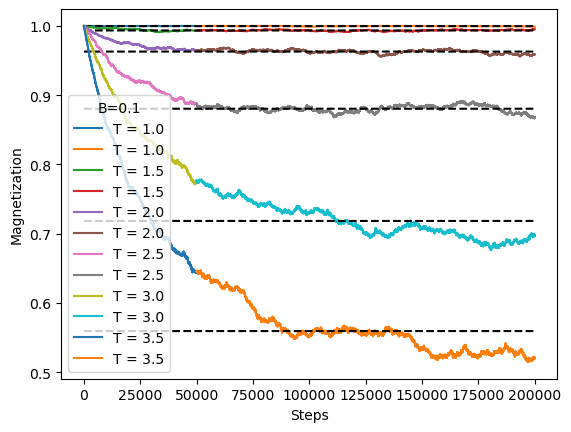

<Figure size 640x480 with 0 Axes>

In [36]:
temps = np.arange(1, 4, 0.5)

plt.figure()
for temp in temps:
    lattice_spins = np.ones((N, N))
    m_values_up = MCMC(lattice_spins, temp, steps, B)
    burnin_up = 50_000
    m_mean_up = np.mean(m_values_up[burnin_up:])
    m_std_up = np.std(m_values_up[burnin_up:])
    plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label=f"T = {temp}")
    plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label=f"T = {temp}")
    plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"B={B}")
plt.show()

plt.savefig("./plots/fixBmultipleT.png")



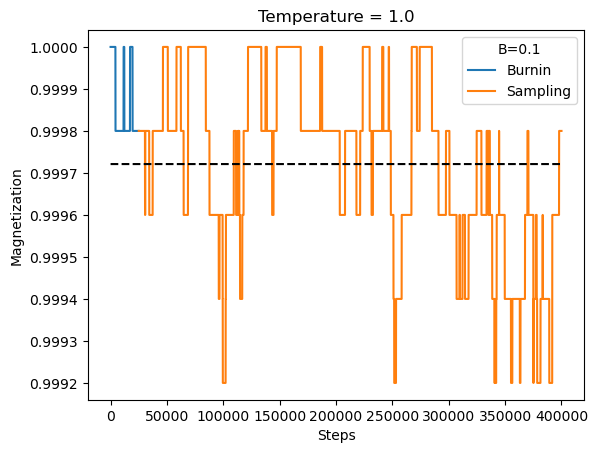

In [37]:
temp = 1
burnin_up = 25_000
steps = 400_000

lattice_spins = np.ones((N, N))
m_values_up = MCMC(lattice_spins, temp, steps, B)

m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burnin")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.title("Temperature = 1.0")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.savefig("./plots/fixB_T=1.0.png")
plt.legend(title=f"B={B}")
plt.show()


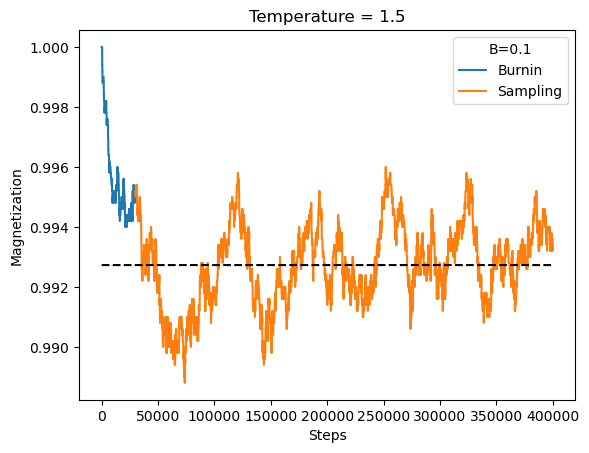

<Figure size 640x480 with 0 Axes>

In [38]:
temp = 1.5
burnin_up = 30_000
steps = 400_000

lattice_spins = np.ones((N, N))
m_values_up = MCMC(lattice_spins, temp, steps, B)

m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burnin")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.title("Temperature = 1.5")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"B={B}")
plt.show()

plt.savefig("./plots/fixB_T=1.5.png")

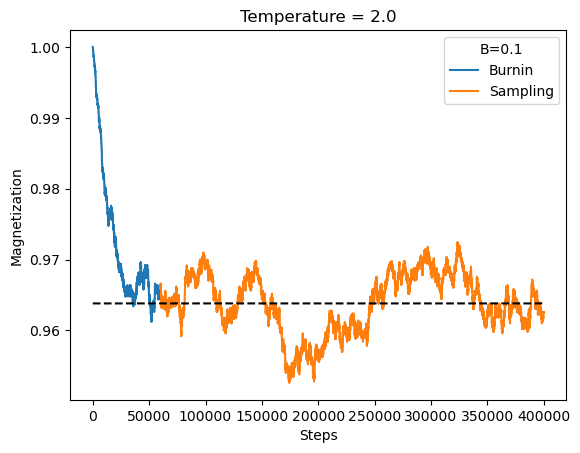

<Figure size 640x480 with 0 Axes>

In [39]:
temp = 2.0
burnin_up = 60_000
steps = 400_000

lattice_spins = np.ones((N, N))
m_values_up = MCMC(lattice_spins, temp, steps, B)

m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burnin")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.title("Temperature = 2.0")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.legend(title=f"B={B}")
plt.show()

plt.savefig("./plots/fixB_T=2.0.png")

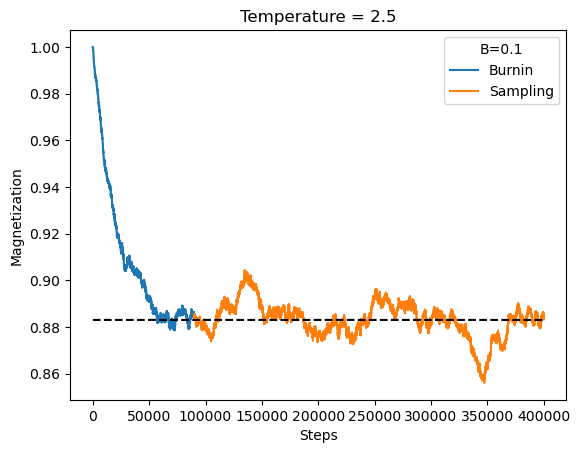

<Figure size 640x480 with 0 Axes>

In [40]:
temp = 2.5
burnin_up = 90_000
steps = 400_000

lattice_spins = np.ones((N, N))
m_values_up = MCMC(lattice_spins, temp, steps, B)

m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burnin")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("Temperature = 2.5")
plt.legend(title=f"B={B}")
plt.show()

plt.savefig("./plots/fixB_T=2.5.png")

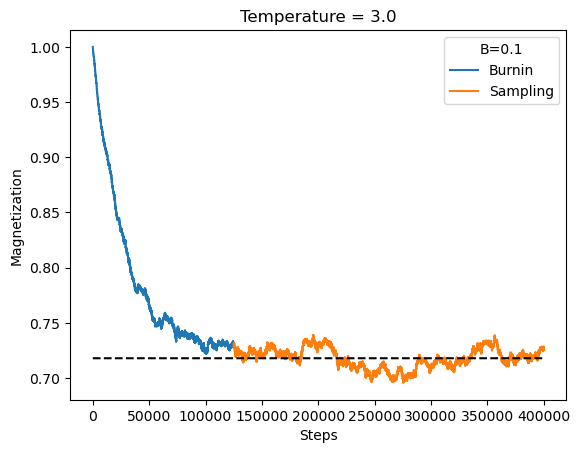

<Figure size 640x480 with 0 Axes>

In [41]:
temp = 3.0
burnin_up = 125_000
steps = 400_000

lattice_spins = np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values_up = MCMC(lattice_spins, temp, steps, B)

m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burnin")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("Temperature = 3.0")
plt.legend(title=f"B={B}")
plt.show()

plt.savefig("./plots/fixB_T=3.0.png")

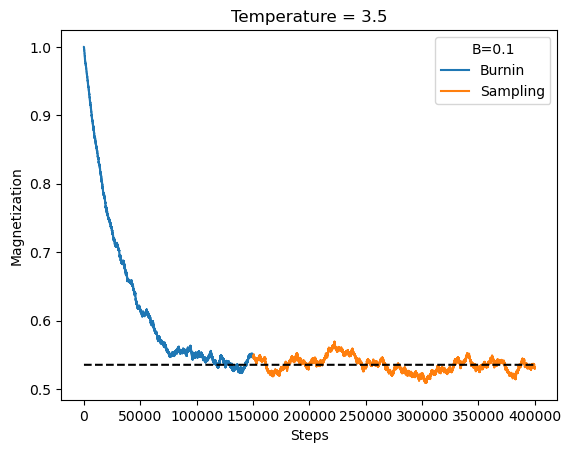

<Figure size 640x480 with 0 Axes>

In [42]:
temp = 3.5
burnin_up = 150_000
steps = 400_000

lattice_spins = np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values_up = MCMC(lattice_spins, temp, steps, B)

m_mean_up = np.mean(m_values_up[burnin_up:])
m_std_up = np.std(m_values_up[burnin_up:])
plt.plot(range(steps)[:burnin_up], np.abs(m_values_up[:burnin_up]), label="Burnin")
plt.plot(range(steps)[burnin_up:], np.abs(m_values_up[burnin_up:]), label="Sampling")
plt.plot(range(steps), m_mean_up * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("Temperature = 3.5")
plt.legend(title=f"B={B}")
plt.show()

plt.savefig("./plots/fixB_T=3.5.png")

In [43]:
print(m_mean_up * np.ones((steps)))

[0.53548228 0.53548228 0.53548228 ... 0.53548228 0.53548228 0.53548228]


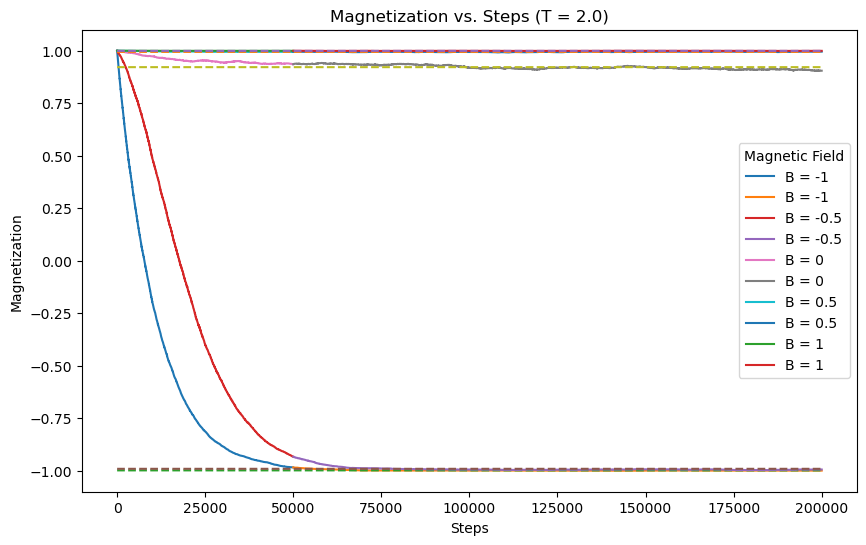

<Figure size 640x480 with 0 Axes>

In [44]:
N = 100
J = 1
KB = 1
fixed_temp = 2.0 
B_values = [-1, -0.5, 0, 0.5, 1] 
steps = 200_000
burnin = 50_000

plt.figure(figsize=(10, 6))

for B in B_values:
    # if B > 0:
    #     lattice = np.ones((N, N))  # Align spins with B > 0
    # elif B < 0:
    #     lattice = -np.ones((N, N))  # Align spins with B < 0
    # else:
    #     lattice = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
    lattice = np.ones((N, N))
    m_values = MCMC(lattice, temp=fixed_temp, steps=steps, B=B)
    m_abs = np.abs(m_values)
    
    plt.plot(range(steps)[:burnin], m_values[:burnin], label=f"B = {B}")
    plt.plot(range(steps)[burnin:], m_values[burnin:], label=f"B = {B}")
    plt.plot(range(steps), np.mean(m_values[burnin:]) * np.ones(steps), "--")

plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title(f"Magnetization vs. Steps (T = {fixed_temp})")
plt.legend(title="Magnetic Field")
plt.show()

plt.savefig("./plots/fixTmultipleB.png")

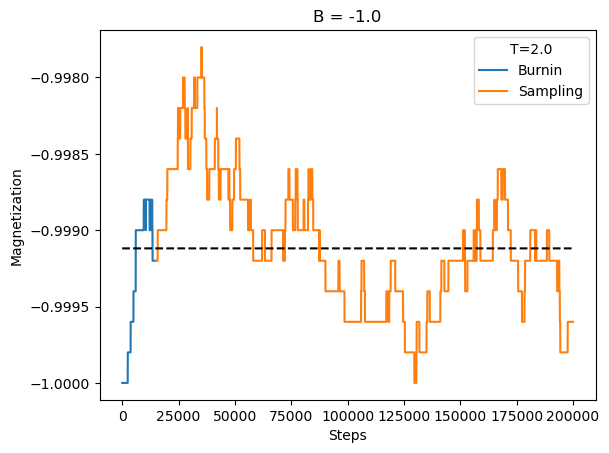

<Figure size 640x480 with 0 Axes>

In [45]:
temp = 2.0
B = -1.0
burnin = 15_000
steps = 200_000

lattice_spins = -np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values = MCMC(lattice_spins, temp, steps, B)

m_mean = np.mean(m_values[burnin:])
m_std = np.std(m_values[burnin:])
plt.plot(range(steps)[:burnin], (m_values[:burnin]), label="Burnin")
plt.plot(range(steps)[burnin:], (m_values[burnin:]), label="Sampling")
plt.plot(range(steps), m_mean * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("B = -1.0")
plt.legend(title=f"T={temp}")
plt.show()

plt.savefig("./plots/fixT_B=-1.0.png")

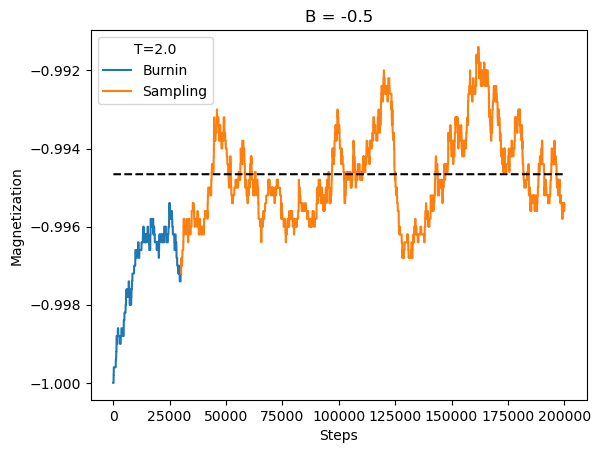

<Figure size 640x480 with 0 Axes>

In [46]:
temp = 2.0
B = -0.5
burnin = 30_000
steps = 200_000

lattice_spins = -np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values = MCMC(lattice_spins, temp, steps, B)

m_mean = np.mean(m_values[burnin:])
m_std = np.std(m_values[burnin:])
plt.plot(range(steps)[:burnin], (m_values[:burnin]), label="Burnin")
plt.plot(range(steps)[burnin:], (m_values[burnin:]), label="Sampling")
plt.plot(range(steps), m_mean * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("B = -0.5")
plt.legend(title=f"T={temp}")
plt.show()

plt.savefig("./plots/fixT_B=-0.5.png")

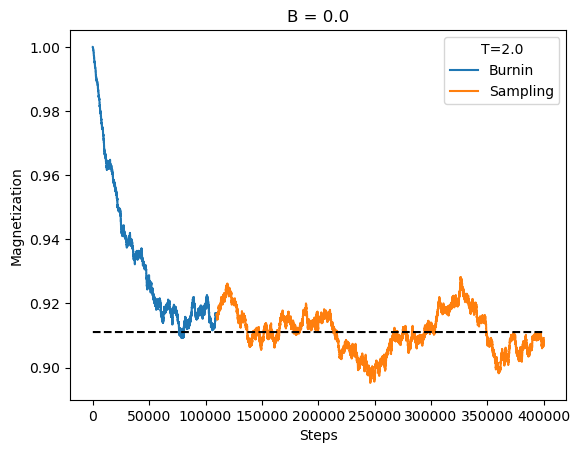

<Figure size 640x480 with 0 Axes>

In [47]:
temp = 2.0
B = 0.0
burnin = 110_000
steps = 400_000

lattice_spins = np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values = MCMC(lattice_spins, temp, steps, B)

m_mean = np.mean(m_values[burnin:])
m_std = np.std(m_values[burnin:])
plt.plot(range(steps)[:burnin], (m_values[:burnin]), label="Burnin")
plt.plot(range(steps)[burnin:], (m_values[burnin:]), label="Sampling")
plt.plot(range(steps), m_mean * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("B = 0.0")
plt.legend(title=f"T={temp}")
plt.show()

plt.savefig("./plots/fixT_B=0.0.png")

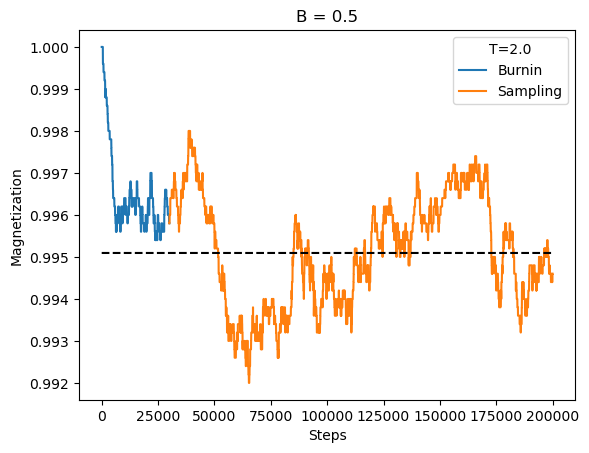

<Figure size 640x480 with 0 Axes>

In [48]:
temp = 2.0
B = 0.5
burnin = 30_000
steps = 200_000

lattice_spins = np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values = MCMC(lattice_spins, temp, steps, B)

m_mean = np.mean(m_values[burnin:])
m_std = np.std(m_values[burnin:])
plt.plot(range(steps)[:burnin], (m_values[:burnin]), label="Burnin")
plt.plot(range(steps)[burnin:], (m_values[burnin:]), label="Sampling")
plt.plot(range(steps), m_mean * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("B = 0.5")
plt.legend(title=f"T={temp}")
plt.show()

plt.savefig("./plots/fixT_B=0.5.png")

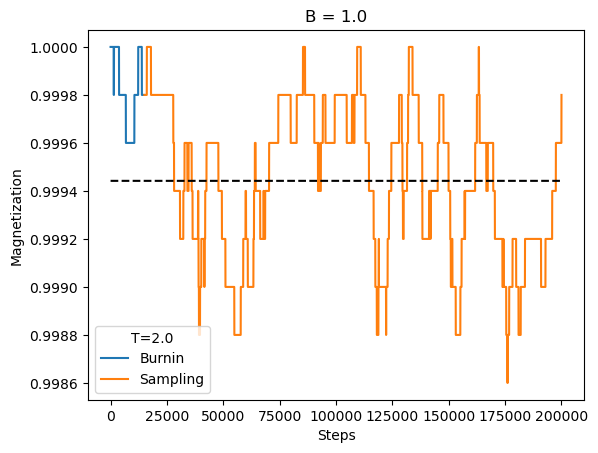

<Figure size 640x480 with 0 Axes>

In [49]:
temp = 2.0
B = 1.0
burnin = 15_000
steps = 200_000

lattice_spins = np.ones((N, N))
# lattice_spins = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
m_values = MCMC(lattice_spins, temp, steps, B)

m_mean = np.mean(m_values[burnin:])
m_std = np.std(m_values[burnin:])
plt.plot(range(steps)[:burnin], (m_values[:burnin]), label="Burnin")
plt.plot(range(steps)[burnin:], (m_values[burnin:]), label="Sampling")
plt.plot(range(steps), m_mean * np.ones((steps)), "--", color="black")
plt.xlabel("Steps")
plt.ylabel("Magnetization")
plt.title("B = 1.0")
plt.legend(title=f"T={temp}")
plt.show()

plt.savefig("./plots/fixT_B=1.0.png")

### Problem B
Plot 1D scans of the magnetization $M$ versus $T$ for fixed $B$ at three different values: $B<0$, $B=0$, and $B>0$.
Plot 1D scans of the magnetization $M$ versus $B$ for fixed $T$ at three different values: $T<T_C$, $T=T_C$, and $T>T_C$, where $T_C=\frac{2}{\ln(1+\sqrt{2})}\approx 2.269$.

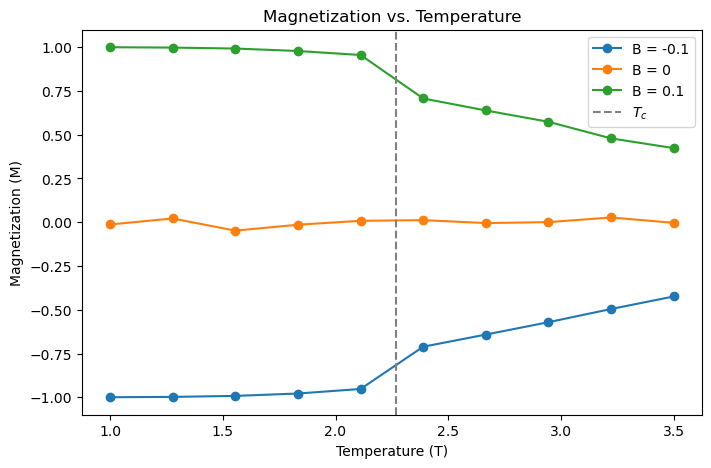

<Figure size 640x480 with 0 Axes>

In [50]:
N = 100
B_values = [-0.1, 0, 0.1]
T_range = np.linspace(1.0, 3.5, 10) 
steps = 200_000
burn_in = 50_000

M_vs_T = {B: [] for B in B_values}
for B in B_values:
    for T in T_range:
        # Initialize lattice: ordered for T < Tc and B ≠ 0
        if T < 2.269 and B != 0:
            lattice = np.ones((N, N)) if B > 0 else -np.ones((N, N))
        else:
            lattice = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
        
        m_values = MCMC(lattice, temp=T, B=B, steps=steps)
        M = np.mean(m_values)
        M_vs_T[B].append(M)

plt.figure(figsize=(8, 5))
for B in B_values:
    plt.plot(T_range, M_vs_T[B], 'o-', label=f'B = {B}')
plt.axvline(2.269, c='gray', ls='--', label='$T_c$')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (M)')
plt.legend()
plt.title('Magnetization vs. Temperature')
plt.show()

plt.savefig("./plots/Magnetization vs. Temperature.png")

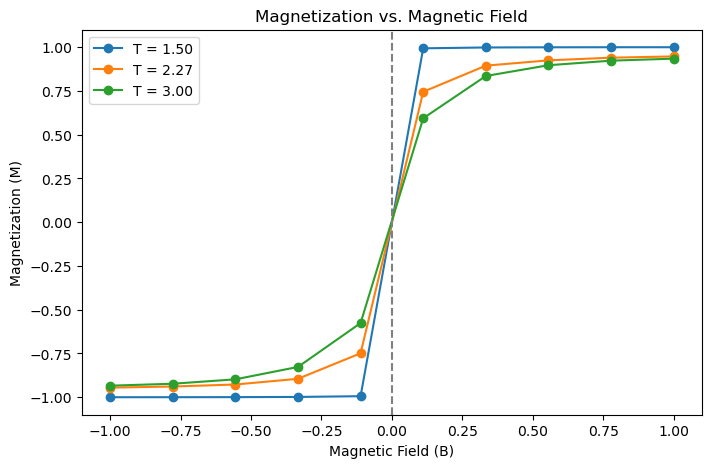

<Figure size 640x480 with 0 Axes>

In [51]:
T_values = [1.5, 2.269, 3.0] 
B_range = np.linspace(-1.0, 1.0, 10)
steps = 200_000
burn_in = 50_000

M_vs_B = {T: [] for T in T_values}
for T in T_values:
    for B in B_range:
        if T < 2.269 and B != 0:
            lattice = np.ones((N, N)) if B > 0 else -np.ones((N, N))
        else:
            lattice = 2 * (np.random.randint(2, size=(N, N)) - 0.5)
        
        m_values = MCMC(lattice, temp=T, B=B, steps=steps)
        M_vs_B[T].append(np.mean(m_values))

plt.figure(figsize=(8, 5))
for T in T_values:
    plt.plot(B_range, M_vs_B[T], 'o-', label=f'T = {T:.2f}')
plt.xlabel('Magnetic Field (B)')
plt.ylabel('Magnetization (M)')
plt.legend()
plt.axvline(0, c='gray', ls='--', label='$B=0$')
plt.title('Magnetization vs. Magnetic Field')
plt.show()

plt.savefig("./plots/Magnetization vs. Magnetic Field.png")

### Problem C

Putting this all together, draw/describe the phase diagram in $B$ versus $T$ of the 2D Ising model, where the magnetization $M$ is the order parameter.
Consider discussing first-order phase transitions and critical exponents, hysteresis and metastable states, and/or specific heat and susceptibility.
See Refs.~\cite{Eastman:2014,Krauss:2018} for relevant discussions.

In [52]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
M_data = data['M_data']
T_range = data['T_range']
B_range = data['B_range']

plt.figure(figsize=(8, 6))
plt.imshow(M_data, extent=[T_range[0], T_range[-1], B_range[0], B_range[-1]], 
           origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label='Average Magnetization')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetic Field (B)')
plt.title('Phase Diagram of the 2D Ising Model')
plt.show()

plt.savefig("./plots/Phase Diagram of the 2D Ising Model.png")

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'